<a href="https://colab.research.google.com/github/Jacobikinz/Project-Hummingbird/blob/master/SimpleNewsGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RSS Live Feed to Pandas


In [27]:
pip install feedparser

In [0]:
from sklearn import cluster, datasets
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import csv
from sklearn.model_selection import train_test_split
import random

**Creating RSS news list**

In [0]:
import feedparser

#news sources to import fromt 
newsurls = {
    'apnews':           'http://hosted2.ap.org/atom/APDEFAULT/3d281c11a96b4ad082fe88aa0db04305',
    'googlenews':       'https://news.google.com/news/rss/?hl=en&amp;ned=us&amp;gl=US',
    'yahoonews':        'http://news.yahoo.com/rss/',
    'cbnc':             'https://www.cnbc.com/id/100003114/device/rss/rss.html',
    'espn':             'http://www.espn.com/espn/rss/news',
    'nytimes_environment':  "http://rss.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml",
    'nytimes_business':     "http://rss.nytimes.com/services/xml/rss/nyt/Business.xml",
    'nytimes_economy':      "http://rss.nytimes.com/services/xml/rss/nyt/Economy.xml",
    'nytimes_dealbook':     "http://rss.nytimes.com/services/xml/rss/nyt/Economy.xml",
    'yawho':          "http://finance.yahoo.com/rss/headline?s=yhoo"
}

#(hopefully) continuously building dataset
data = pd.DataFrame()

#add something useful to the dataframe!!
for key,url in newsurls.items():
  feed = feedparser.parse(url)
  rawData = pd.DataFrame.from_dict(feed['items'])
  data = pd.concat([data, rawData], sort=True)

In [0]:
from datetime import datetime

#yay I'm solving my life problems by creating excessive PANDAS frames
headlines = pd.DataFrame()

headlines['title'], headlines['time_raw'] = data['title'], data['published_parsed'] #lol see

import time as ti
output = []
for val in headlines['time_raw'].values:
    output.append(ti.strftime("%Y-%m-%d %H:%M:%S", val))
       
headlines['fixed_time'] = output 

# Sentiment Analysis

In [31]:
#sentiment stuff!

import nltk
nltk.download('vader_lexicon')

def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score
  
sentiment_raw = headlines['title'].apply(nltk_sentiment)
sentiment = pd.DataFrame(sentiment_raw.values.tolist())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
numericalHeadline = sentiment.iloc[:,0]
time = headlines.iloc[:,1]

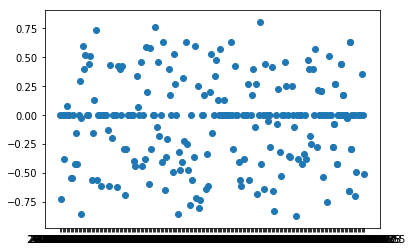

In [33]:
plt.scatter(time, numericalHeadline)

##Getting Minute-by-Minute Data
https://www.cloudsigma.com/nasdaq-per-minute-data-using-python/

In [34]:
import urllib.request
import json
import os

def import_web(ticker):
    """
    :param identifier: List, Takes the company name
    :return:displays companies records per minute
    """
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol='+ticker +'&interval=1min&apikey=' + 'LIH75FGJ5OL2MJSZ' + '&outputsize=full&datatype=json'
    fp = urllib.request.urlopen(url)
    mybytes = fp.read()
    mystr = mybytes.decode("utf8")
    fp.close()
    return mystr


def get_value(ticker):
    js = import_web(ticker)
    parsed_data = json.loads(js) # loads the json and converts the json string into dictionary
    ps = parsed_data['Time Series (1min)']
    partitionSave(ps,ticker)

            
def partitionSave(ps,ticker):
    date = {}
    for i in ps:
        date[i[:10]] = "date"
    for d in date.keys():
        tmp = {}
        for i in ps:
            if(i[:10] == d):
                tmp[i] = ps[i]
        if(os.path.isdir(d) == False):
            os.mkdir(d)
        fname = ticker + "_dann"
        try:
            with open(os.path.join(d,fname),'r') as f:
                t = json.load(f)
                for i in t:
                    tmp[i]=t[i]
        except Exception as e:
            pass
                
        with open(os.path.join(d,fname), 'w') as f:
            json.dump(tmp, f)
                
def main():
    #Start Process
    company_list = ['GOOGL','MSFT','ORCL','FB','AAPL','TSLA'];
    try:
        for company in company_list:
            print("Starting with " + company)
            get_value(company)
            print("Ended Writing Data of " + company)
    except Exception as e:
        print(e)

main()

Starting with GOOGL
Ended Writing Data of GOOGL
Starting with MSFT
Ended Writing Data of MSFT
Starting with ORCL
Ended Writing Data of ORCL
Starting with FB
Ended Writing Data of FB
Starting with AAPL
Ended Writing Data of AAPL
Starting with TSLA
'Time Series (1min)'


In [35]:
cd /content/

/content


In [0]:
from pandas.io.json import json_normalize

#def dataToPandas(ticker, date):
  
with open('2019-05-03/AAPL_dann') as f:
	 parseData_raw = json.load(f)

for key in parseData_raw:
	temp={}
	parseData=parseData_raw[key]
	for key2 in parseData:
		temp[key2[3:]]=float(parseData[key2])
	parseData_raw[key]=temp
  
stockDataCompany = pd.DataFrame(parseData_raw).transpose()

stockDataCompany = stockDataCompany.reset_index()
stockDataCompany['openToClose'] = stockDataCompany['open']-stockDataCompany['close']

In [123]:
#stockDataCompany['index'].replace(regex=True,inplace=True,to_replace=r'-',value=r'')
#stockDataCompany['index'].replace(regex=True,inplace=True,to_replace=r'\:',value=r'')
#stockDataCompany['index'].replace(regex=True,inplace=True,to_replace=r' ',value=r'')

stockDataCompany

,index,close,high,low,open,volume,openToClose
0,2019-05-03 16:00:00,211.7800,211.8000,211.6730,211.7400,423723.0,-0.0400
1,2019-05-03 15:59:00,211.7400,211.7400,211.6450,211.7100,90790.0,-0.0300
2,2019-05-03 15:58:00,211.7100,211.7500,211.5300,211.5546,146965.0,-0.1554
3,2019-05-03 15:57:00,211.5600,211.6900,211.5600,211.6900,105885.0,0.1300
4,2019-05-03 15:56:00,211.6900,211.8100,211.6200,211.6600,173580.0,-0.0300
5,2019-05-03 15:55:00,211.6600,211.7300,211.6300,211.7100,90701.0,0.0500
6,2019-05-03 15:54:00,211.7200,211.7300,211.6600,211.6900,303345.0,-0.0300
7,2019-05-03 15:53:00,211.7000,211.7000,211.5956,211.6100,368025.0,-0.0900
8,2019-05-03 15:52:00,211.6100,211.6500,211.5885,211.6300,60651.0,0.0200
9,2019-05-03 15:51:00,211.6400,211.6600,211.5800,211.5800,71247.0,-0.0600


In [0]:
import datetime 

currentTime = datetime.datetime.now()
currentTime = str(currentTime)

year = currentTime[0:4]
month = currentTime[5:7]
day = currentTime[8:10]


def openStock(ticker):
  for i in range(5):
    currentDay = int(day)-i
    with open(+year+'-'+month+'-'+day+'/'+ticker+'_dann') as f:
	    parseData_raw = json.load(f)

    for key in parseData_raw:
	    temp={}
	    parseData=parseData_raw[key]
	    for key2 in parseData:
		    temp[key2[3:]]=float(parseData[key2])
	    parseData_raw[key]=temp
  
  stockDataCompany = pd.DataFrame(parseData_raw).transpose()
  
  return stockDataCompany

In [65]:
stockDataCompany

,close,high,low,open,volume,openToClose
2019-05-03 16:00:00,211.7800,211.8000,211.6730,211.7400,423723.0,-0.0400
2019-05-03 15:59:00,211.7400,211.7400,211.6450,211.7100,90790.0,-0.0300
2019-05-03 15:58:00,211.7100,211.7500,211.5300,211.5546,146965.0,-0.1554
2019-05-03 15:57:00,211.5600,211.6900,211.5600,211.6900,105885.0,0.1300
2019-05-03 15:56:00,211.6900,211.8100,211.6200,211.6600,173580.0,-0.0300
2019-05-03 15:55:00,211.6600,211.7300,211.6300,211.7100,90701.0,0.0500
2019-05-03 15:54:00,211.7200,211.7300,211.6600,211.6900,303345.0,-0.0300
2019-05-03 15:53:00,211.7000,211.7000,211.5956,211.6100,368025.0,-0.0900
2019-05-03 15:52:00,211.6100,211.6500,211.5885,211.6300,60651.0,0.0200
2019-05-03 15:51:00,211.6400,211.6600,211.5800,211.5800,71247.0,-0.0600


# Sentiment on "Messed up Dates (News + Stock date)"

In [0]:

data = pd.read_csv('https://raw.githubusercontent.com/Jacobikinz/Project-Hummingbird/master/CSV_Apple_News_Dates_messed_up.csv', dtype=str,delimiter=',', skiprows=0)
news = (data.loc[:,'News'])
#print (news)

In [0]:
nltk_results = [nltk_sentiment(row) for row in news]
results_df = pd.DataFrame(nltk_results)
text_df = pd.DataFrame(news, columns = ['text'])
nltk_df = text_df.join(results_df)

print (results_df)

**Testing the above to make sure it sentiment"ed" the right headline**

In [0]:
sampler = "An Egyptian Salafi preacher said raping and sexually harassing women protesters in Cairos Tahrir Square is justified, calling them crusaders who have no shame, no fear and not even feminism.Australian children are to be banned from blowing out candles on communal birthday cakes under new hygiene regulations35 ancient pyramids discovered in SudanA Somali court has sentenced a woman to a year in prison after she accused security forces of raping her.Woman vandalizes famous Louvre painting Liberty Leading the People by DelacroixThe drone war is a shadow war, widely reported in the media but officially unacknowledged by the CIA and the White House. no one knows precisely how many casualties our shadow war has caused, but media and NGO reports suggest that the number of deaths is somewhere between 3,000 and 5,000.Aviation experts say new Iranian stealth jet is a pathetic hoax that cant even flyPolice defuse bomb in Madrid cathedralAll dogs will now have to be microchipped in EnglandSpain Offers Citizenship to Descendants of Jews Forced Out During the Inquisition The brutal gang rape and murder of a young woman on Saturday have led to an outpouring of anger among South Africans, frustrated with a national epidemic of sexual violence.Personal finance education to be compulsory across EnglandUN says bribe payments soar in Afghanistan - Survey found that $3.9bn, twice the nations domestic revenue, was paid in bribes in 2012.Child-free seats on AirAsia for just 25 extraVermont Maple Sugar Candy Producer implicated in Canadian $20-million maple syrup heist from Quebec warehouseBorn In An Iranian Prison -- And Into A Lifetime Of ConsequencesBack in the USSR? Key Soviet document that proclaimed the death of the Soviet Union is missingBlunt Words on China from U.S. NavySuicide bomber blows himself up near Mali soldiers Turkey tells US envoy to stop meddling in its affairs35 pyramids discovered in a Sudan NecropolisDerision, bafflement over Egypt prime ministers remark on unhygienic breasts causing diarrheaA Sri Lankan prisoner who tried to hide his cellphone during a search of his cell was caught out when guards heard a ring tone emanating from his rectum - complete with x-ray image.Gunmen Kill 9 in Attacks on Nigerian Polio Clinics - Attacks come after  local cleric denounced polio vaccination campaigns &amp; local radio programs repeated previous conspiracy theories about such campaigns being a Western plot to harm Muslims.Overwhelmed by a critical housing crisis, Hong Kongs poorest residents forced to live in metal cages"

print (results_df[0:1] == nltk_sentiment(sampler))

print (results_df[0:1]) #the first combined headlines
print (nltk_sentiment(sampler))

#Note I manually edited the text (deleted the "" and added a few extra spaces) so it could fit as a "sampler" string

# ML Linear Regression with Sentiment + Stock data

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linregtest = LinearRegression(normalize=True)

closer_2_close_data = (data.loc[:,'Close to Close'])

linregtest.fit(results_df, closer_2_close_data)
predicted_close = linregtest.predict(RSS_array) #Outputs where he should have been drafted

predicted_close[0]

**Split Train/Test**

In [0]:
train, test = train_test_split(data, test_size=0.2)

#Training
train_close = (train.loc[:,'Close to Close'])
#train_sentiment = (train.loc[:,'Pk',].values)


"""
#Test
test_PTS_n_stats = (test.loc[:,'PTS':].values)
test_Pk = (test.loc[:,'Pk',].values)
names_college_test = (test.loc[:,'Player',].values)


#---------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linregtest = LinearRegression(normalize=True)

linregtest.fit(train_PTS_n_stats, train_Pk)
predicted_pick = linregtest.predict(test_PTS_n_stats) #Outputs where he should have been drafted

#R SQUARED
rsq_score = r2_score(test_Pk, predicted_pick) 
print ("r^2 for the model:", round(rsq_score,5))
print ("\n")
"""


# Extra/End of Code

In [0]:
"""
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)
"""


In [0]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')


class Splitter(object):
    def __init__(self):
        self.nltk_splitter = nltk.data.load('tokenizers/punkt/english.pickle')
        self.nltk_tokenizer = nltk.tokenize.TreebankWordTokenizer()

    def split(self, text):
        """
        input format: a paragraph of text
        output format: a list of lists of words.
            e.g.: [['this', 'is', 'a', 'sentence'], ['this', 'is', 'another', 'one']]
        """
        sentences = self.nltk_splitter.tokenize(text)
        tokenized_sentences = [self.nltk_tokenizer.tokenize(sent) for sent in sentences]
        return tokenized_sentences


class POSTagger(object):
    def __init__(self):
        pass
        
    def pos_tag(self, sentences):
        """
        input format: list of lists of words
            e.g.: [['this', 'is', 'a', 'sentence'], ['this', 'is', 'another', 'one']]
        output format: list of lists of tagged tokens. Each tagged tokens has a
        form, a lemma, and a list of tags
            e.g: [[('this', 'this', ['DT']), ('is', 'be', ['VB']), ('a', 'a', ['DT']), ('sentence', 'sentence', ['NN'])],
                    [('this', 'this', ['DT']), ('is', 'be', ['VB']), ('another', 'another', ['DT']), ('one', 'one', ['CARD'])]]
        """

        pos = [nltk.pos_tag(sentence) for sentence in sentences]
        #adapt format
        pos = [[(word, word, [postag]) for (word, postag) in sentence] for sentence in pos]
        return pos
      
      
text = """What can I say about this place. The staff of the restaurant is nice and the eggplant is not bad. Apart from that, very uninspired food, lack of atmosphere and too expensive. I am a staunch vegetarian and was sorely dissapointed with the veggie options on the menu. Will be the last time I visit, I recommend others to avoid."""

splitter = Splitter()
postagger = POSTagger()

splitted_sentences = splitter.split(text)

print (splitted_sentences)

pos_tagged_sentences = postagger.pos_tag(splitted_sentences)

print (pos_tagged_sentences)


class DictionaryTagger(object):
    def __init__(self, dictionary_paths):
        files = [open(path, 'r') for path in dictionary_paths]
        dictionaries = [yaml.load(dict_file) for dict_file in files]
        map(lambda x: x.close(), files)
        self.dictionary = {}
        self.max_key_size = 0
        for curr_dict in dictionaries:
            for key in curr_dict:
                if key in self.dictionary:
                    self.dictionary[key].extend(curr_dict[key])
                else:
                    self.dictionary[key] = curr_dict[key]
                    self.max_key_size = max(self.max_key_size, len(key))

    def tag(self, postagged_sentences):
        return [self.tag_sentence(sentence) for sentence in postagged_sentences]

    def tag_sentence(self, sentence, tag_with_lemmas=False):
        """
        the result is only one tagging of all the possible ones.
        The resulting tagging is determined by these two priority rules:
            - longest matches have higher priority
            - search is made from left to right
        """
        tag_sentence = []
        N = len(sentence)
        if self.max_key_size == 0:
            self.max_key_size = N
        i = 0
        while (i < N):
            j = min(i + self.max_key_size, N) #avoid overflow
            tagged = False
            while (j > i):
                expression_form = ' '.join([word[0] for word in sentence[i:j]]).lower()
                expression_lemma = ' '.join([word[1] for word in sentence[i:j]]).lower()
                if tag_with_lemmas:
                    literal = expression_lemma
                else:
                    literal = expression_form
                if literal in self.dictionary:
                    #self.logger.debug("found: %s" % literal)
                    is_single_token = j - i == 1
                    original_position = i
                    i = j
                    taggings = [tag for tag in self.dictionary[literal]]
                    tagged_expression = (expression_form, expression_lemma, taggings)
                    if is_single_token: #if the tagged literal is a single token, conserve its previous taggings:
                        original_token_tagging = sentence[original_position][2]
                        tagged_expression[2].extend(original_token_tagging)
                    tag_sentence.append(tagged_expression)
                    tagged = True
                else:
                    j = j - 1
            if not tagged:
                tag_sentence.append(sentence[i])
                i += 1
        return tag_sentence